<a href="https://colab.research.google.com/github/Ishakasar/NY_Airbnb/blob/main/Isha_Kasar_Team_4_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
df = pd.read_csv(working_directory + 'AB_NYC_2019.csv')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [161]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [162]:
x=df['latitude']
y=df['longitude']

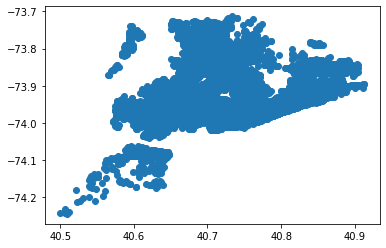

In [163]:
plt.scatter(x, y)


In [164]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [165]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [166]:
df['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


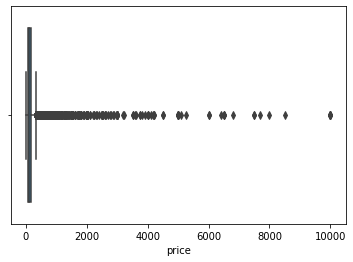

In [167]:
#checking for outliers
sns.boxplot(df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


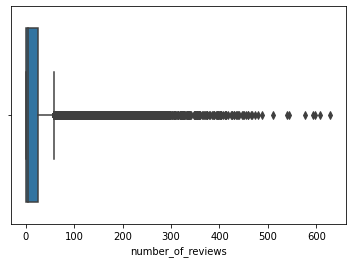

In [168]:
sns.boxplot(df['number_of_reviews'])


In [169]:
#creating new df with specific columns
new_df={'host_id':df['host_id'],'neighbourhood_group' : df['neighbourhood_group'],'neighbourhood':df['neighbourhood'],'latitude':df['latitude'],'longitude':df['longitude'],'room_type':df['room_type'],'price': df['price'],'minimum_nights':df['minimum_nights'],'number_of_reviews': df['number_of_reviews'],'calculated_host_listings_count':df['calculated_host_listings_count']       }
NY=pd.DataFrame(new_df)

In [170]:
#check for outliers in price and number of reviews 
NY.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000


In [171]:
#remove outliers
Q1 = np.percentile(df['price'],25)
Q2 = np.percentile(df['price'],50)
Q3 = np.percentile(df['price'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
NY=NY[(NY['price']<b) & (NY['price']>a)]

In [172]:
#remove outliers
Q1 = np.percentile(df['number_of_reviews'],25)
Q2 = np.percentile(df['number_of_reviews'],50)
Q3 = np.percentile(df['number_of_reviews'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
NY=NY[(NY['number_of_reviews']<b) & (NY['number_of_reviews']>a)]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


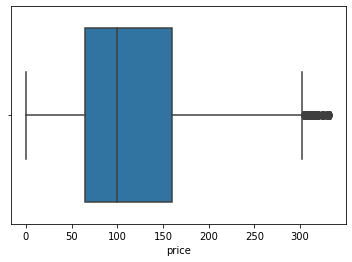

In [173]:
sns.boxplot(NY['price'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


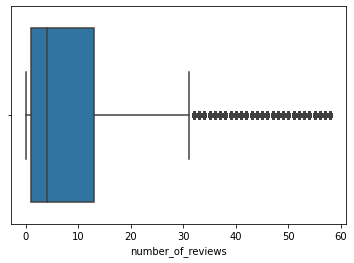

In [174]:
sns.boxplot(NY['number_of_reviews'])


In [175]:
NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40066 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         40066 non-null  int64  
 1   neighbourhood_group             40066 non-null  object 
 2   neighbourhood                   40066 non-null  object 
 3   latitude                        40066 non-null  float64
 4   longitude                       40066 non-null  float64
 5   room_type                       40066 non-null  object 
 6   price                           40066 non-null  int64  
 7   minimum_nights                  40066 non-null  int64  
 8   number_of_reviews               40066 non-null  int64  
 9   calculated_host_listings_count  40066 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.4+ MB


In [176]:
NY.loc[df['price'] == 0]


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
23161,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,4
25433,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,4
25634,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,5
25753,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2
25778,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,1
26259,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,1
26841,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,6
26866,101970559,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,6


In [177]:
NY.drop(NY.index[NY['price'] == 0], inplace = True)

In [178]:
NY.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1


In [179]:
NY.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40058 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         40058 non-null  int64  
 1   neighbourhood_group             40058 non-null  object 
 2   neighbourhood                   40058 non-null  object 
 3   latitude                        40058 non-null  float64
 4   longitude                       40058 non-null  float64
 5   room_type                       40058 non-null  object 
 6   price                           40058 non-null  int64  
 7   minimum_nights                  40058 non-null  int64  
 8   number_of_reviews               40058 non-null  int64  
 9   calculated_host_listings_count  40058 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.4+ MB


In [180]:
NY.neighbourhood_group.unique() 


array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [181]:
NY.neighbourhood.unique()


array(['Kensington', 'Midtown', 'Harlem', 'East Harlem',
       'Bedford-Stuyvesant', 'Upper West Side', 'West Village',
       'Crown Heights', 'Williamsburg', 'Park Slope', 'Windsor Terrace',
       'Inwood', "Hell's Kitchen", 'East Village', 'Flatbush',
       'South Slope', 'Fort Greene', 'Prospect-Lefferts Gardens',
       'Kips Bay', 'Lower East Side', 'SoHo', 'Clinton Hill',
       'Washington Heights', 'Woodside', 'Bushwick', 'Prospect Heights',
       'Chelsea', 'Gowanus', 'Upper East Side', 'Flatlands', 'Greenpoint',
       'Cobble Hill', 'Flushing', 'Sunnyside', 'DUMBO', 'Jamaica',
       'Middle Village', 'Ridgewood', 'Ditmars Steinway',
       'Roosevelt Island', 'Chinatown', 'Greenwich Village',
       'Little Italy', 'Clason Point', 'Eastchester', 'Carroll Gardens',
       'Kingsbridge', 'Boerum Hill', 'Astoria', 'Queens Village',
       'Rockaway Beach', 'Forest Hills', 'Morningside Heights',
       'Gravesend', 'Nolita', 'Emerson Hill', 'Long Island City',
       'Fort

In [182]:
NY.room_type.unique() 


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)